In [9]:
import pandas as pd
from matplotlib_venn import venn3, venn3_circles
import os
import json
from matplotlib import pyplot as plt


In [10]:
# load the config files and the variables from the upset_plot-section of the config file
config_path = ""
config_filename = "config_all_3files.json"
f = open(os.path.join(config_path, config_filename))
IO_json = json.load(f)

#var = "per_user_id"
var = "per_user_id_date"
root_data_dir_name = IO_json["root_data_dir_name"]
input = IO_json["plots"]["input"][var]
dataset_labels = IO_json["plots"]["dataset_labels"]
output = IO_json["plots"]["days_per_person_output"]

cols = []
for ds in dataset_labels:
    if "comment" in ds: continue
    cols.append(dataset_labels[ds])
print(cols)

['OpenAPS (NS)', 'OPENonOH (NS)', 'OPENonOH (AAPS-Uploader)']


In [11]:

df = pd.read_csv(os.path.join(root_data_dir_name, input[0], input[1]), header=0, parse_dates=[1], index_col=0)
#df2 = df[["belongs_to_datasets", "person_id", "date"]].groupby(["belongs_to_datasets", "person_id"]).agg("count")
df2 = df[["belongs_to_datasets", "person_id", "date"]].groupby(["belongs_to_datasets", "person_id"],dropna=False,as_index=False).agg("count")
#print(df2)
#print(df2[df2["belongs_to_datasets"]=="1"]["date"])
person_count_min = df2["date"].min()
person_count_max = df2["date"].max()

/home/reinhold/Daten/OPEN/days_per_person_n_dataset.png


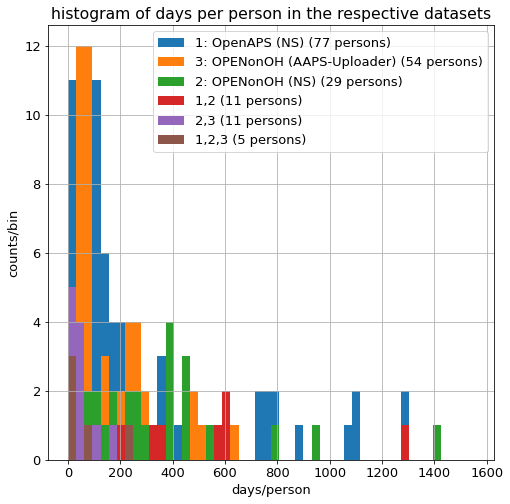

In [12]:
plt.rcParams.update({"figure.facecolor" : (1.0, 1.0, 1.0, 1.0), "savefig.facecolor": (1.0, 1.0, 1.0, 1.0)})
plt.rcParams["font.size"] = 13
plt.figure(figsize=(8,8))
plt.tight_layout()
plt.grid()
bins = range(person_count_min, person_count_max, int((person_count_max-person_count_min)*0.02))  # 50 bins
person_counts = {}
for ds in df["belongs_to_datasets"].unique():
    #print(ds)
    person_count_values = df2[df2["belongs_to_datasets"]==ds]["date"].values
    if len(person_count_values) > 0: 
        person_counts[ds] = (len(person_count_values), person_count_values, ds)

for pc in sorted(person_counts, key=lambda x: person_counts[x][0], reverse=True):
    #print(pc, person_counts[pc])
    if person_counts[pc][2] in dataset_labels:
        label_ = f"{person_counts[pc][2]}: {dataset_labels[person_counts[pc][2]]}"
    else:
        label_ = person_counts[pc][2]
    plt.hist(person_counts[pc][1], bins=bins, histtype="bar", label=f"{label_} ({len(person_counts[pc][1])} persons)")
plt.title(output[2])
plt.xlabel("days/person")
plt.ylabel("counts/bin")
    
plt.legend()
#plt.show()
plt.savefig(os.path.join(root_data_dir_name, output[0], output[1]))
print(os.path.join(root_data_dir_name, output[0], output[1]))